In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy.stats import linregress
np.random.seed(42069)

In [2]:
df = pd.read_csv('BaseDatosEstudio.csv')
df.head()

,Unnamed: 0,seqn,sddsrvyr,ridstatr,ridexmon,riagendr,ridageyr,ridagemn,ridageex,ridreth1,...,wtdr2d.1,dr2tkcal,dr2tcalc,dr2tphos,bmxwt,bmxht,bmxbmi,bmxwaist,bpxsar,bpxdar
0,1,21005,3,2,1,1,19,232.0,233.0,4,...,2420.727816,2211.0,776.0,1292.0,137.6,164.5,50.85,135.9,NaN,NaN
1,2,21006,3,2,2,2,16,203.0,205.0,4,...,2312.365446,1218.0,493.0,705.0,55.2,163.0,20.78,73.6,98.0,50.0
2,3,21007,3,2,1,2,14,172.0,172.0,3,...,15327.120025,746.0,355.0,479.0,47.9,161.2,18.43,69.5,96.0,62.0
3,4,21008,3,2,2,1,17,208.0,209.0,4,...,18690.555956,2014.0,1435.0,1784.0,70.0,184.1,20.65,74.7,104.0,74.0
4,5,21009,3,2,2,1,55,671.0,672.0,3,...,170262.470827,3475.0,994.0,1710.0,103.1,181.6,31.26,118.4,118.0,85.0


In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df[df['riagendr'] == 2]['lbdvidms'].get_values()

array([45.9, 65.5, 40.9, ..., 32.6, 61.6, 51.9])

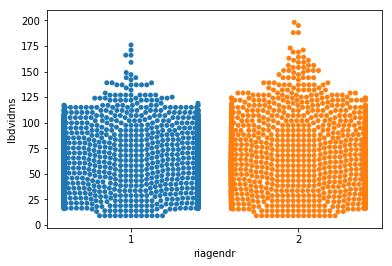

In [7]:
sns.swarmplot(y=df['lbdvidms'], x=df['riagendr'])

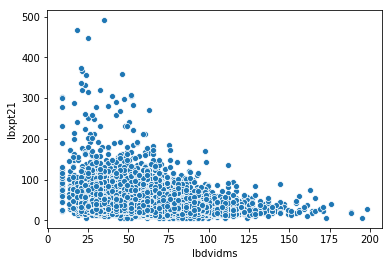

In [5]:
sns.scatterplot(x=df['lbdvidms'], y=df['lbxpt21'])

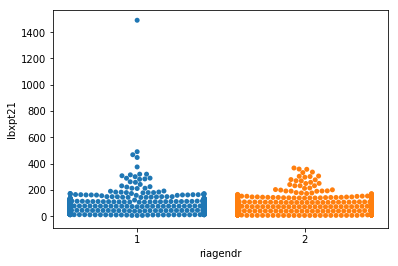

In [5]:
sns.swarmplot(x=df['riagendr'], y=df['lbxpt21'])

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


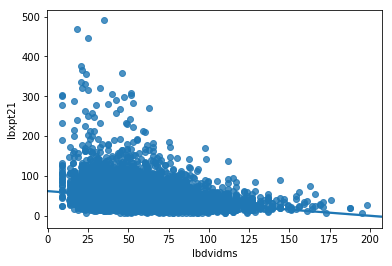

In [6]:
sns.regplot(x=df['lbdvidms'], y=df['lbxpt21'])

In [8]:
obesos = df[df['bmxbmi'] >= 30]
obesos.head()

,seqn,sddsrvyr,ridstatr,ridexmon,riagendr,ridageyr,ridagemn,ridageex,ridreth1,dmqmilit,...,wtdr2d.1,dr2tkcal,dr2tcalc,dr2tphos,bmxwt,bmxht,bmxbmi,bmxwaist,bpxsar,bpxdar
0,21005,3,2,1,1,19,232.0,233.0,4,2.0,...,2420.727816,2211.0,776.0,1292.0,137.6,164.5,50.85,135.9,NaN,NaN
4,21009,3,2,2,1,55,671.0,672.0,3,2.0,...,170262.470827,3475.0,994.0,1710.0,103.1,181.6,31.26,118.4,118.0,85.0
13,21019,3,2,2,2,50,606.0,607.0,1,2.0,...,7009.889967,852.0,683.0,1067.0,88.1,152.2,38.03,102.7,113.0,75.0
24,21033,3,2,2,2,57,687.0,688.0,4,2.0,...,19322.124584,1374.0,559.0,955.0,90.3,167.8,32.07,103.0,146.0,74.0
30,21039,3,2,2,2,84,1011.0,1011.0,3,2.0,...,61375.806558,1691.0,808.0,1548.0,82.8,157.2,33.51,111.8,112.0,52.0


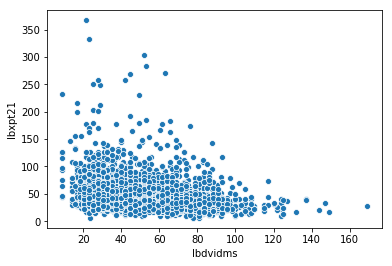

In [9]:
sns.scatterplot(x=obesos['lbdvidms'], y=obesos['lbxpt21'])

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


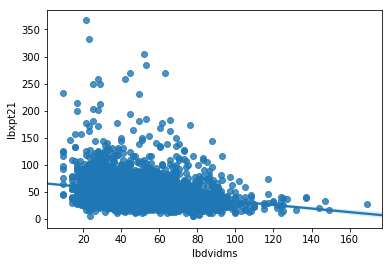

In [10]:
sns.regplot(x=obesos['lbdvidms'], y=obesos['lbxpt21'])

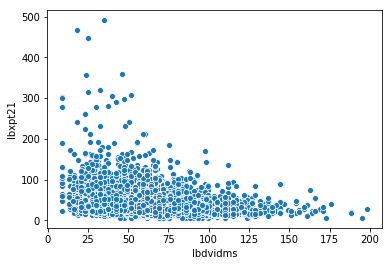

In [18]:
no_obesos = df[df['bmxbmi'] < 30]
sns.scatterplot(x=no_obesos['lbdvidms'], y=no_obesos['lbxpt21'])

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


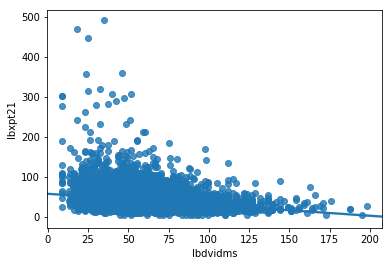

In [19]:
sns.regplot(x=no_obesos['lbdvidms'], y=no_obesos['lbxpt21'])

In [121]:
it = 1000
f = np.random.choice
gordos = [linregress(f(obesos['lbdvidms'].dropna(), 7000),f(obesos['lbxpt21'].dropna(), 7000)) for _ in range(it)]
flacos = [linregress(f(no_obesos['lbdvidms'].dropna(), 7000), f(no_obesos['lbxpt21'].dropna(), 7000)) for _ in range(it)]

In [122]:
gordos_slope = np.mean(np.matrix(gordos)[:, 0])
gordos_b = np.mean(np.matrix(gordos)[:, 1])
flacos_slope = np.mean(np.matrix(flacos)[:, 0])
flacos_b = np.mean(np.matrix(flacos)[:, 1])
print(gordos_slope, gordos_b)
print(flacos_slope, flacos_b)

-0.0004945535294724675 48.734331124900024
-0.0006636806017812076 41.85508168444817


### Hormona Paratiroidea en gordos (vitamina D) = -0.0005 Vitamina D + 48
### Hormona Paratiroide en flacos (vitamina D) = -0.00066 Vitamina D + 41